# Description

Generates the figure for top cell types for a specified LV (in Settings section below).

# Modules loading

In [1]:
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data.recount2 import LVAnalysis
from utils import chunker
import conf

# Settings

In [2]:
LV_NAME = "LV96"

In [3]:
LV_AXIS_THRESHOLD = None # 3.0
# LV_AXIS_THRESHOLD = 2.0
N_TOP_SAMPLES = 400
N_TOP_ATTRS = 15

In [4]:
# OUTPUT_FIGURES_DIR = Path(
#     conf.MANUSCRIPT["FIGURES_DIR"], "lvs_analysis", f"{LV_NAME.lower()}"
# ).resolve()
# display(OUTPUT_FIGURES_DIR)
# OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

In [5]:
# OUTPUT_CELL_TYPE_FILEPATH = OUTPUT_FIGURES_DIR / f"{LV_NAME.lower()}-cell_types.svg"
# display(OUTPUT_CELL_TYPE_FILEPATH)

# Load MultiPLIER summary

In [6]:
multiplier_model_summary = pd.read_pickle(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [7]:
multiplier_model_summary.shape

(2157, 5)

In [8]:
multiplier_model_summary.head()

,pathway,LV index,AUC,p-value,FDR
1,KEGG_LYSINE_DEGRADATION,1,0.388059,0.866078,0.956005
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
4,KEGG_DNA_REPLICATION,1,0.549473,0.312155,0.539951
5,PID_MYC_ACTIVPATHWAY,1,0.639303,0.021702,0.083739


# Load data

## Original data

In [9]:
# INPUT_SUBSET = "z_score_std"

In [10]:
# INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [11]:
# input_filepath = Path(
#     conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
#     INPUT_SUBSET,
#     f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
# ).resolve()
# display(input_filepath)

# assert input_filepath.exists(), "Input file does not exist"

# input_filepath_stem = input_filepath.stem
# display(input_filepath_stem)

In [12]:
# data = pd.read_pickle(input_filepath)

In [13]:
# data.shape

In [14]:
# data.head()

## LV data

In [15]:
# lv_obj = LVAnalysis(LV_NAME, data)
lv_obj = LVAnalysis(LV_NAME)

In [16]:
multiplier_model_summary[
    multiplier_model_summary["LV index"].isin((LV_NAME[2:],))
    & (
        (multiplier_model_summary["FDR"] < 0.05)
        | (multiplier_model_summary["AUC"] >= 0.75)
    )
]

,pathway,LV index,AUC,p-value,FDR
414,SVM T cells follicular helper,96,0.689263,0.004435,0.024527
415,SVM NK cells activated,96,0.729687,0.000274,0.002569


In [17]:
lv_data = lv_obj.get_experiments_data()

SRP060416, SRP056049, SRP005279, SRP055569, SRP064464, SRP057196, SRP042161, SRP014428, SRP018853, SRP024268, SRP050499, SRP066834, 

In [18]:
lv_data.shape

(3985, 29)

In [19]:
lv_data.head()

tonsil donor facs gating                     cell type  \
project   run                                                                 
SRP060416 SRR2088096    Donor T74          NK  tonsil Innate lymphoid cells   
          SRR2088128    Donor T74        ILC3  tonsil Innate lymphoid cells   
          SRR2088153    Donor T75        ILC3  tonsil Innate lymphoid cells   
          SRR2088179    Donor T75        ILC3  tonsil Innate lymphoid cells   
          SRR2088205    Donor T75        ILC3  tonsil Innate lymphoid cells   

                     diagnosis cell population all lineage bcp all subtype  \
project   run                                                                
SRP060416 SRR2088096       NaN             NaN         NaN             NaN   
          SRR2088128       NaN             NaN         NaN             NaN   
          SRR2088153       NaN             NaN         NaN             NaN   
          SRR2088179       NaN             NaN         NaN             NaN   
          SRR2088205       NaN             NaN         NaN             NaN   

                     cytogenetic background disease state tissue  ...  \
project   run                                                     ...   
SRP060416 SRR2088096                    NaN           NaN    NaN  ...   
          SRR2088128                    NaN           NaN    NaN  ...   
          SRR2088153                    NaN           NaN    NaN  ...   
          SRR2088179                    NaN           NaN    NaN  ...   
          SRR2088205                    NaN           NaN    NaN  ...   

                     patient id subtype sample type status barcode gender  \
project   run                                                               
SRP060416 SRR2088096        NaN     NaN         NaN    NaN     NaN    NaN   
          SRR2088128        NaN     NaN         NaN    NaN     NaN    NaN   
          SRR2088153        NaN     NaN         NaN    NaN     NaN    NaN   
          SRR2088179        NaN     NaN         NaN    NaN     NaN    NaN   
          SRR2088205        NaN     NaN         NaN    NaN     NaN    NaN   

                      tnm developmental stage Stage      LV96  
project   run                                                  
SRP060416 SRR2088096  NaN                 NaN   NaN  0.028097  
          SRR2088128  NaN                 NaN   NaN  0.310938  
          SRR2088153  NaN                 NaN   NaN -0.027354  
          SRR2088179  NaN                 NaN   NaN  0.005507  
          SRR2088205  NaN                 NaN   NaN -0.056516  

[5 rows x 29 columns]

# LV cell types analysis

## Get top attributes

In [20]:
lv_attrs = lv_obj.get_attributes_variation_score()
display(lv_attrs.head(20))

tonsil donor              0.173755
facs gating               0.173755
cell type                 0.058198
cytogenetic background    0.019599
diagnosis                 0.016801
cell population           0.016801
all lineage               0.010181
disease state             0.008787
bcp all subtype           0.008504
age                       0.002175
experiment_sample_name    0.002160
c1 chip id                0.002160
tnm                       0.001950
ercc_dilution             0.001836
ercc_mix                  0.001836
cell count                0.001836
qc pass                   0.001836
assigned cell type        0.001836
tissue                    0.001756
patient id                0.001574
dtype: float64

In [21]:
# show those with cell type or tissue in their name
_tmp = pd.Series(lv_attrs.index)
lv_attrs[
    _tmp.str.match(
        "(?:cell.+type$)|(?:tissue$)|(?:tissue.+type$)",
        case=False,
        flags=re.IGNORECASE,
    ).values
].sort_values(ascending=False)

cell type    0.058198
tissue       0.001756
dtype: float64

In [23]:
_tmp = lv_data.loc[
    :,
    [
        # "cell line",
        "cell type",
        # "tissue type",
        "tissue",
        # "tissue subtype",
        # "tissue type",
        LV_NAME,
    ],
]

In [24]:
_tmp_seq = list(chunker(_tmp.sort_values(LV_NAME, ascending=False), 25))

In [25]:
_tmp_seq[0]

cell type tissue      LV96
project   run                                                      
SRP060416 SRR2088322  tonsil Innate lymphoid cells    NaN  3.834958
          SRR2088319  tonsil Innate lymphoid cells    NaN  2.438952
          SRR2088342  tonsil Innate lymphoid cells    NaN  2.126921
          SRR2088318  tonsil Innate lymphoid cells    NaN  2.105389
          SRR2088330  tonsil Innate lymphoid cells    NaN  2.059954
          SRR2088355  tonsil Innate lymphoid cells    NaN  2.023071
          SRR2088348  tonsil Innate lymphoid cells    NaN  1.999237
          SRR2088317  tonsil Innate lymphoid cells    NaN  1.885077
          SRR2088352  tonsil Innate lymphoid cells    NaN  1.870101
          SRR2088300  tonsil Innate lymphoid cells    NaN  1.854340
          SRR2088343  tonsil Innate lymphoid cells    NaN  1.761903
          SRR2088337  tonsil Innate lymphoid cells    NaN  1.635141
          SRR2088314  tonsil Innate lymphoid cells    NaN  1.619554
          SRR2088349  tonsil Innate lymphoid cells    NaN  1.575962
          SRR2088353  tonsil Innate lymphoid cells    NaN  1.533474
          SRR2088341  tonsil Innate lymphoid cells    NaN  1.468251
          SRR2088303  tonsil Innate lymphoid cells    NaN  1.406369
          SRR2088306  tonsil Innate lymphoid cells    NaN  1.346551
          SRR2088321  tonsil Innate lymphoid cells    NaN  1.333721
          SRR2088333  tonsil Innate lymphoid cells    NaN  1.287848
          SRR2088294  tonsil Innate lymphoid cells    NaN  1.268954
          SRR2088566  tonsil Innate lymphoid cells    NaN  1.233040
          SRR2088328  tonsil Innate lymphoid cells    NaN  1.227889
          SRR2088324  tonsil Innate lymphoid cells    NaN  1.225491
          SRR2088340  tonsil Innate lymphoid cells    NaN  1.211957

In [26]:
# # what is there in these projects?
# lv_data.loc[["SRP011422"]].dropna(how="all", axis=1).sort_values(
#     LV_NAME, ascending=False
# ).sort_values(LV_NAME, ascending=False).head(10)

In [27]:
SELECTED_ATTRIBUTE = "cell type"

In [28]:
# it has to be in the order desired for filling nans in the SELECTED_ATTRIBUTE
SECOND_ATTRIBUTES = ["tissue"]

## Get plot data

In [134]:
plot_data = lv_data.loc[:, [SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES + [LV_NAME]]

In [135]:
# if blank/nan, fill cell type column with tissue content
_new_column = plot_data[[SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES].fillna(
    method="backfill", axis=1
)[SELECTED_ATTRIBUTE]
plot_data[SELECTED_ATTRIBUTE] = _new_column
plot_data = plot_data.drop(columns=SECOND_ATTRIBUTES)
plot_data = plot_data.fillna({SELECTED_ATTRIBUTE: "NOT CATEGORIZED"})
# plot_data = plot_data.dropna(subset=[SELECTED_ATTRIBUTE])

In [136]:
plot_data = plot_data.sort_values(LV_NAME, ascending=False)

In [137]:
plot_data.head(20)

cell type      LV96
project   run                                               
SRP060416 SRR2088322  tonsil Innate lymphoid cells  3.834958
          SRR2088319  tonsil Innate lymphoid cells  2.438952
          SRR2088342  tonsil Innate lymphoid cells  2.126921
          SRR2088318  tonsil Innate lymphoid cells  2.105389
          SRR2088330  tonsil Innate lymphoid cells  2.059954
          SRR2088355  tonsil Innate lymphoid cells  2.023071
          SRR2088348  tonsil Innate lymphoid cells  1.999237
          SRR2088317  tonsil Innate lymphoid cells  1.885077
          SRR2088352  tonsil Innate lymphoid cells  1.870101
          SRR2088300  tonsil Innate lymphoid cells  1.854340
          SRR2088343  tonsil Innate lymphoid cells  1.761903
          SRR2088337  tonsil Innate lymphoid cells  1.635141
          SRR2088314  tonsil Innate lymphoid cells  1.619554
          SRR2088349  tonsil Innate lymphoid cells  1.575962
          SRR2088353  tonsil Innate lymphoid cells  1.533474
          SRR2088341  tonsil Innate lymphoid cells  1.468251
          SRR2088303  tonsil Innate lymphoid cells  1.406369
          SRR2088306  tonsil Innate lymphoid cells  1.346551
          SRR2088321  tonsil Innate lymphoid cells  1.333721
          SRR2088333  tonsil Innate lymphoid cells  1.287848

## Customize x-axis values

When cell type values are not very clear, customize their names by looking at their specific studies to know exactly what the authors meant.

In [138]:
final_plot_data = plot_data.replace(
    {
        SELECTED_ATTRIBUTE: {
            # "human bone marrow sample": "bone marrow",
            "whole blood": "Whole blood",
            # "peripheral blood": "Peripheral blood",
            # "peripheral whole blood": "Peripheral blood",
            # "breast cancer": "Breast cancer",
            # "breast cancer cell line": "Breast cancer",
            # SRP057196
            # "fetal_replicating": "Fetal neurons (replicating)",
            # "fetal_quiescent": "Fetal neurons (quiescent)",
            # "normal skin": "Skin",
            # "liver": "Liver",
            # "Human Skeletal Muscle Myoblasts (HSMM)": "Skeletal muscle myoblasts",
            # "astrocytes": "Astrocytes",
            "mixture of U87 human glioma cells and MCF10a human breast cancer cells": "Glioma + MCF10 breast cancer cells",
            "mixture of U87 human glioma cells and WI-38 human lung fibroblast cells": "Glioma + WI-38 lung fibroblast cells",
            # "functional hepatocytes generated by lineage reprogramming": "Hepatocytes",
            # "human adipose-derived stem cells": "Adipose-derived stem cells",
            # "adipose": "Adipose",
            # "embryonic stem cells": "Embryonic stem cells",
            # "primary keratinocytes": "Primary keratinocytes",
            # "fetal liver": "Fetal liver",
            # "in vitro differentiated erythroid cells": "Erythroid cells",
            # "WAT": "White adipose tissue",
            # "BAT": "Brown adipose tissue",
            # "Uninvolved Breast Tissue Adjacent to ER+ Primary Tumor": "Breast tissue adjacent to ER+ tumor",
            # "ovarian granulosa cells": "Ovarian granulosa cells",
        }
    }
)

In [139]:
# sorte index to avoid PerformanceWarning from pandas
final_plot_data = final_plot_data.sort_index()

In [140]:
_srp_code = "SRP060416"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: x[SELECTED_ATTRIBUTE]
    + f" ({lv_data.loc[(_srp_code, x.name), 'facs gating']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [141]:
# _srp_code = "SRP059172"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: x[SELECTED_ATTRIBUTE]
#     + f" ({lv_data.loc[(_srp_code, x.name), 'group']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [142]:
# _srp_code = "SRP062966"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: x[SELECTED_ATTRIBUTE]
#     + f" ({lv_data.loc[(_srp_code, x.name), 'disease status']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [143]:
_srp_code = "SRP064464"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: f"Pancreatic islets"
    + f" ({lv_data.loc[(_srp_code, x.name), 'assigned cell type']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [144]:
# _srp_code = "SRP029990" # these cases seem to be the same in SRP032775 and are just a few
# final_plot_data = final_plot_data.drop((_srp_code,))

In [145]:
# _srp_code = "SRP032775" # this one is also about Maralia

# main_attr = "time point"
# second_attrs = ["time-point"]

# def _apply_func(x):
#     return "Whole blood" + f" ({x[main_attr].lower()}, Malaria)"

# _lv_data = lv_data.loc[(_srp_code,), [main_attr] + second_attrs + [LV_NAME]]
# _new_column = _lv_data[[main_attr] + second_attrs].fillna(
#     method="backfill", axis=1
# )[main_attr]
# _lv_data[main_attr] = _new_column
# # _lv_data = _lv_data.drop(columns=second_attrs)

# _tmp = _lv_data.apply(
#     _apply_func,
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [146]:
# _srp_code = "SRP059039"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: x[SELECTED_ATTRIBUTE]
#     + f" ({lv_data.loc[(_srp_code, x.name), 'group']} cases)",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [147]:
# _srp_code = "SRP056443"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: x[SELECTED_ATTRIBUTE]
#     + f" ({lv_data.loc[(_srp_code, x.name), 'time']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [148]:
# _srp_code = "SRP056840"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Whole blood"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'sirs outcomes']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [149]:
# _srp_code = "SRP050000"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Peripheral blood (SIRS or sepsis)",
#     # + f" ({lv_data.loc[(_srp_code, x.name), 'sirs outcomes']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [150]:
# _srp_code = "SRP045500"
# _tmp = lv_data.loc[(_srp_code,)].apply(
#     lambda x: x["celltype"],
#     # + f" ({lv_data.loc[(_srp_code, x.name), 'sirs outcomes']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [151]:
_srp_code = "SRP057196"
_tmp = lv_data.loc[(_srp_code,)].apply(
    lambda x: x["tissue"]
    + f" ({lv_data.loc[(_srp_code, x.name), 'cell type']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

/tmp/ipykernel_917/3922095706.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  _tmp = lv_data.loc[(_srp_code,)].apply(


In [152]:
# _srp_code = "SRP058773"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: f"Fibroblasts",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [153]:
_srp_code = "SRP050499"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: f"Primordial germ cells (PGC)",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [154]:
# _srp_code = "SRP027015"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Peripheral blood (MM.1S)",
#     # + f" ({lv_data.loc[(_srp_code, x.name), 'facs gating']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [155]:
# _srp_code = "SRP061329"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Peripheral blood"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'cell line']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [156]:
# _srp_code = "SRP018838"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Blood"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'cell line']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [157]:
_srp_code = "SRP056049"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: "CCR6+, CD4+ T"
    + f" ({lv_data.loc[(_srp_code, x.name), 'diagnosis']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [158]:
# _srp_code = "SRP018853"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "CD4+ T"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'status']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [159]:
# # take the top samples only
# final_plot_data = final_plot_data.sort_values(LV_NAME, ascending=False)[:N_TOP_SAMPLES]

## Threshold LV values

In [160]:
if LV_AXIS_THRESHOLD is not None:
    final_plot_data.loc[
        final_plot_data[LV_NAME] > LV_AXIS_THRESHOLD, LV_NAME
    ] = LV_AXIS_THRESHOLD

## Delete samples with no tissue/cell type information

In [161]:
# final_plot_data = final_plot_data[
#     final_plot_data[SELECTED_ATTRIBUTE] != "NOT CATEGORIZED"
# ]

## Set x-axis order

In [162]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .max()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [163]:
len(attr_order)

15

In [164]:
attr_order[:5]

['tonsil Innate lymphoid cells (ILC2)',
 'tonsil Innate lymphoid cells (ILC1)',
 'tonsil Innate lymphoid cells (ILC3)',
 'CCR6+, CD4+ T (Multiple Sclerosis)',
 'tonsil Innate lymphoid cells (NK)']

## Plot

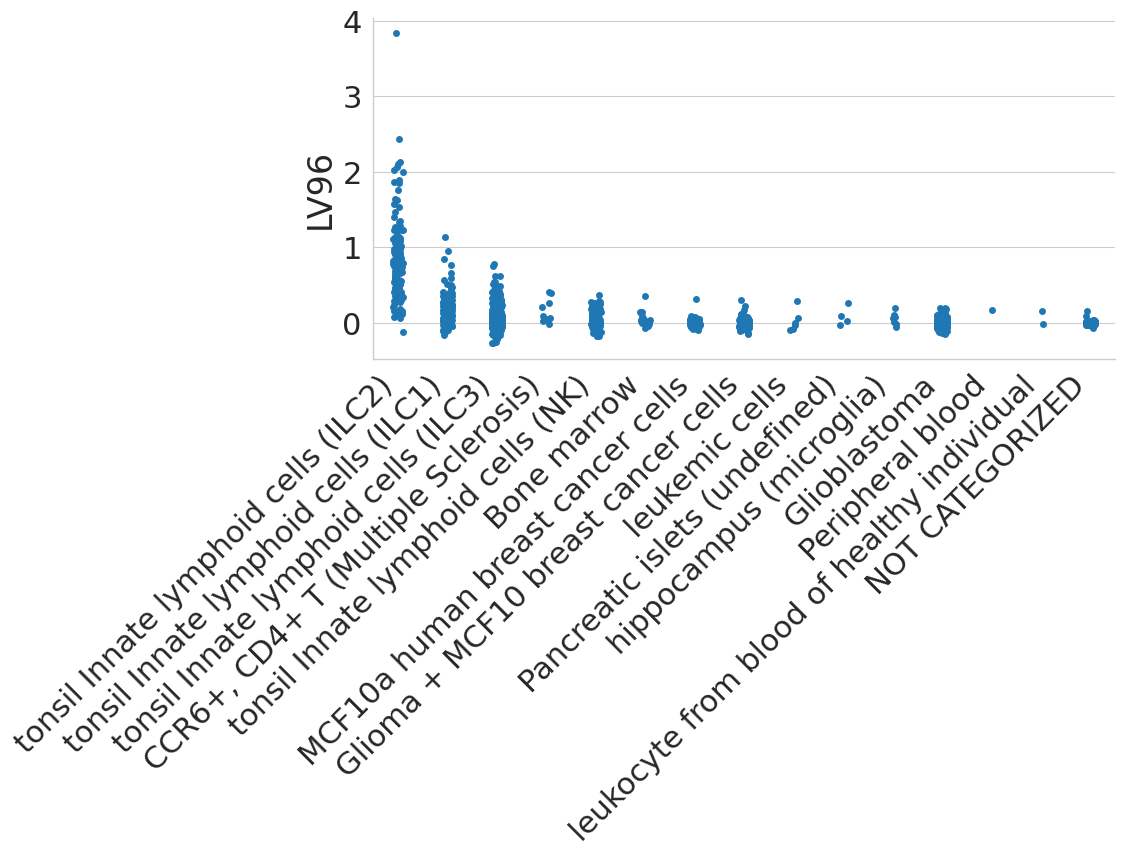

In [165]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="strip",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )

In [166]:
# with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
#     g = sns.catplot(
#         data=final_plot_data,
#         y=LV_NAME,
#         x=SELECTED_ATTRIBUTE,
#         order=attr_order,
#         kind="box",
#         height=5,
#         aspect=2.5,
#     )
#     plt.xticks(rotation=45, horizontalalignment="right")
#     plt.xlabel("")

#     # plt.savefig(
#     #     OUTPUT_CELL_TYPE_FILEPATH,
#     #     bbox_inches="tight",
#     #     facecolor="white",
#     # )

# Debug

In [59]:
with pd.option_context(
    "display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None
):
    _tmp = final_plot_data[final_plot_data[SELECTED_ATTRIBUTE].str.contains("^NOT CATEGORIZED$")].sort_values(LV_NAME, ascending=False)
    display(_tmp.head(20))

cell type      LV96
project   run                                  
SRP056049 SRR1909145  NOT CATEGORIZED  0.409300
          SRR1909144  NOT CATEGORIZED  0.395039
          SRR1909143  NOT CATEGORIZED  0.266785
          SRR1909141  NOT CATEGORIZED  0.207608
SRP018853 SRR765025   NOT CATEGORIZED  0.150161
SRP056049 SRR1909133  NOT CATEGORIZED  0.111458
          SRR1909132  NOT CATEGORIZED  0.104506
          SRR1909142  NOT CATEGORIZED  0.094094
SRP018853 SRR764986   NOT CATEGORIZED  0.090135
SRP056049 SRR1909130  NOT CATEGORIZED  0.067683
          SRR1909136  NOT CATEGORIZED  0.067313
          SRR1909135  NOT CATEGORIZED  0.065616
          SRR1909139  NOT CATEGORIZED  0.055186
          SRR1909134  NOT CATEGORIZED  0.039358
          SRR1909140  NOT CATEGORIZED  0.035083
SRP018853 SRR765046   NOT CATEGORIZED  0.034707
          SRR764980   NOT CATEGORIZED  0.030809
SRP014428 SRR522115   NOT CATEGORIZED  0.026664
SRP056049 SRR1909138  NOT CATEGORIZED  0.024884
          SRR1909131  NOT CATEGORIZED  0.024553

In [133]:
# what is there in these projects?
_tmp = lv_data.loc[["SRP056049"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
)

display(_tmp.head(60))

diagnosis  \
project   run                              
SRP056049 SRR1909145  Multiple Sclerosis   
          SRR1909144  Multiple Sclerosis   
          SRR1909143  Multiple Sclerosis   
          SRR1909141  Multiple Sclerosis   
          SRR1909133             Healthy   
          SRR1909132             Healthy   
          SRR1909142  Multiple Sclerosis   
          SRR1909130             Healthy   
          SRR1909136  Multiple Sclerosis   
          SRR1909135             Healthy   
          SRR1909139  Multiple Sclerosis   
          SRR1909134             Healthy   
          SRR1909140  Multiple Sclerosis   
          SRR1909138  Multiple Sclerosis   
          SRR1909131             Healthy   
          SRR1909137  Multiple Sclerosis   

                                                        cell population  \
project   run                                                             
SRP056049 SRR1909145  CCR6+, CD4+ T cells from HLA-DR4+ MS patient, ...   
          SRR1909144  CCR6+, CD4+ T cells from HLA-DR4+ MS patient, ...   
          SRR1909143  CCR6+, CD4+ T cells from HLA-DR4+ MS patient, ...   
          SRR1909141  CCR6+, CD4+ T cells from HLA-DR4+ MS patient, ...   
          SRR1909133  CCR6+, CD4+ T cells from HLA-DR4+ healthy cont...   
          SRR1909132  CCR6+, CD4+ T cells from HLA-DR4+ healthy cont...   
          SRR1909142  CCR6+, CD4+ T cells from HLA-DR4+ MS patient, ...   
          SRR1909130  CCR6+, CD4+ T cells from HLA-DR4+ healthy cont...   
          SRR1909136  CCR6+, CD4+ T cells from HLA-DR4+ MS patient, ...   
          SRR1909135  CCR6+, CD4+ T cells from HLA-DR4+ healthy cont...   
          SRR1909139  CCR6+, CD4+ T cells from HLA-DR4+ MS patient, ...   
          SRR1909134  CCR6+, CD4+ T cells from HLA-DR4+ healthy cont...   
          SRR1909140  CCR6+, CD4+ T cells from HLA-DR4+ MS patient, ...   
          SRR1909138  CCR6+, CD4+ T cells from HLA-DR4+ MS patient, ...   
          SRR1909131  CCR6+, CD4+ T cells from HLA-DR4+ healthy cont...   
          SRR1909137  CCR6+, CD4+ T cells from HLA-DR4+ MS patient, ...   

                          LV96  
project   run                   
SRP056049 SRR1909145  0.409300  
          SRR1909144  0.395039  
          SRR1909143  0.266785  
          SRR1909141  0.207608  
          SRR1909133  0.111458  
          SRR1909132  0.104506  
          SRR1909142  0.094094  
          SRR1909130  0.067683  
          SRR1909136  0.067313  
          SRR1909135  0.065616  
          SRR1909139  0.055186  
          SRR1909134  0.039358  
          SRR1909140  0.035083  
          SRR1909138  0.024884  
          SRR1909131  0.024553  
          SRR1909137 -0.014160

In [100]:
_tmp["status"].value_counts()

pre-T1D    41
healthy    37
Name: status, dtype: int64

# Reduced plot

## Data stats

In [ ]:
plot_data_stats = final_plot_data.describe()[LV_NAME]
display(plot_data_stats)

In [ ]:
plot_data_stats_by_cell_type = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .describe()[LV_NAME]
    .sort_values("50%", ascending=False)
)
display(plot_data_stats_by_cell_type)

In [ ]:
# keep cell types whose median is larger than the global median
selected_cell_types = plot_data_stats_by_cell_type[
    (plot_data_stats_by_cell_type["50%"] > max(plot_data_stats.loc["50%"], 0.0))
].index
display(selected_cell_types)

In [ ]:
final_plot_data.shape

In [ ]:
final_plot_data = final_plot_data[
    final_plot_data[SELECTED_ATTRIBUTE].isin(selected_cell_types)
]

In [ ]:
final_plot_data.shape

## Set x-axis order

In [ ]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .median()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [ ]:
len(attr_order)

In [ ]:
attr_order[:5]

## Plot

In [ ]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="box",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )